<a href="https://colab.research.google.com/github/Villanelev/credit_scoring_project/blob/main/notebooks/credit_scoring_mvp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка

библитеки

In [57]:
!pip install catboost shap -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.5 MB/s eta 0:00:00


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

репозиторий и датасет

In [2]:
import os

USER_NAME = "USER_NAME"
REPO_NAME = "REPO_NAME"
TOKEN = "TOKEN"
EMAIL = "EMAIL"

REPO_URL = f"https://{TOKEN}@github.com/{USER_NAME}/{REPO_NAME}.git"

!git clone {REPO_URL}

%cd {REPO_NAME}

!git config --global user.email "{EMAIL}"
!git config --global user.name "{USER_NAME}"

print("Связь установлена! Репозиторий склонирован.")


Cloning into 'credit_scoring_project'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (4/4), done.
/content/credit_scoring_project
Связь установлена! Репозиторий склонирован.


In [3]:
from google.colab import drive
import zipfile

drive.mount('/content/drive')

zip_path = '/content/drive/MyDrive/home-credit-default-risk.zip'
destination_path = '/content/credit_scoring_project/data'

if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(destination_path)
    print(f"Успех! Данные распакованы в {destination_path}")
else:
    print("Файл не найден на Диске. Проверь, что он залился и называется именно так.")


Mounted at /content/drive
Успех! Данные распакованы в /content/credit_scoring_project/data


# Данные

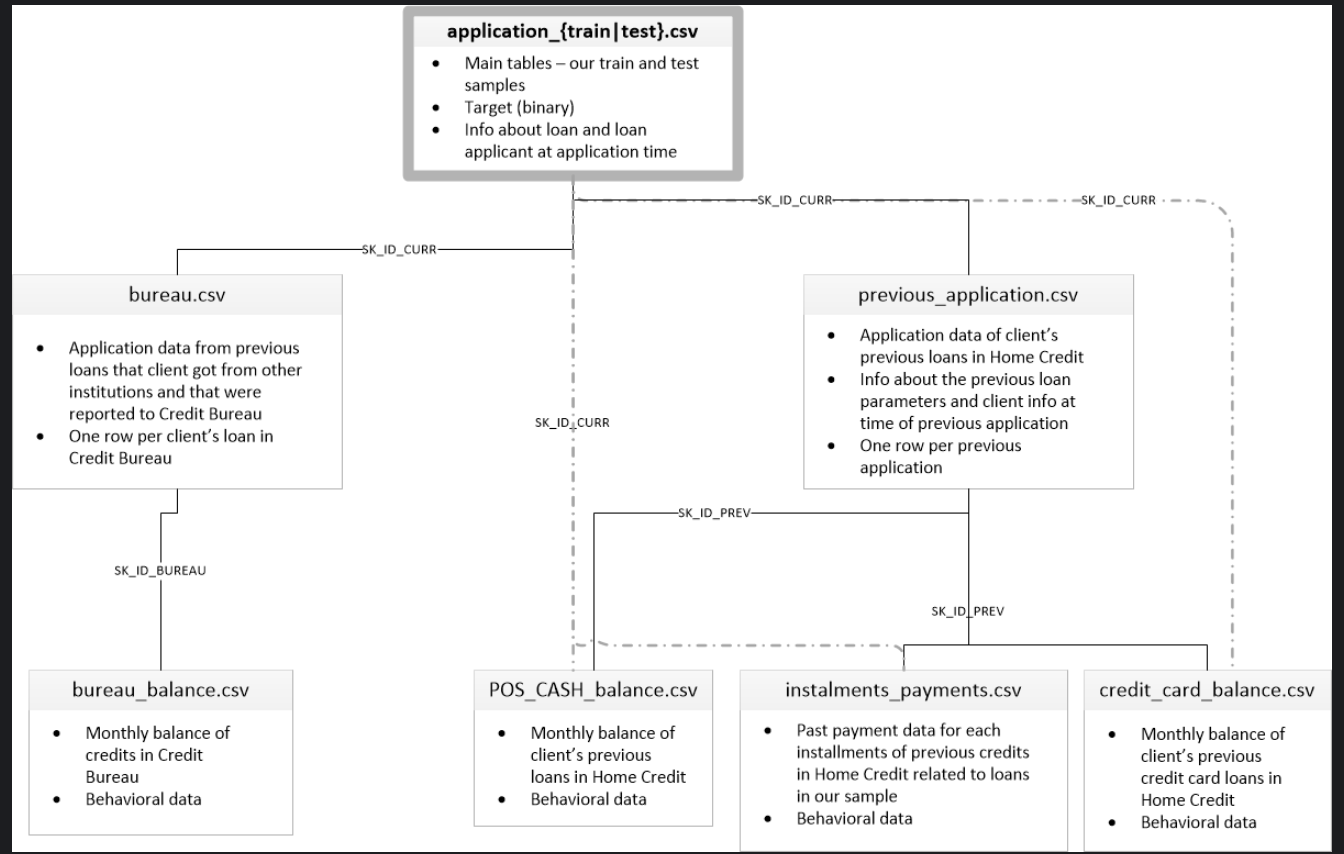

## Application

Начнем с Application



In [40]:
import pandas as pd

train_path = '/content/credit_scoring_project/data/application_train.csv'
df = pd.read_csv(train_path)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [55]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,43.936973
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,11.956133
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.008219
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.150685
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.923288
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.120548


Наблюдаем среднее кол-во дефолтов примерно 8 процентов (дисбаланс)

In [31]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [32]:
for i in df.columns:
  print(i)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

Исправим временные колонки с отрицательными значениями

In [41]:
time_cols = ['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_EMPLOYED', 'DAYS_BIRTH']
for col in time_cols:
  df[col] = abs(df[col])

Корреляция с таргетом

In [42]:
correlations_with_target = df.corrwith(df['TARGET'],numeric_only=True).abs().sort_values(ascending=False)[1:]

In [53]:
correlations_with_target

,0
EXT_SOURCE_3,0.178919
EXT_SOURCE_2,0.160472
EXT_SOURCE_1,0.155317
DAYS_BIRTH,0.078239
REGION_RATING_CLIENT_W_CITY,0.060893
...,...
FLAG_DOCUMENT_12,0.000756
FLAG_MOBIL,0.000534
FLAG_CONT_MOBILE,0.000370
FLAG_DOCUMENT_5,0.000316


Чистка колонок состоящих из одного значения

In [58]:
(df.nunique() == 1).mean()

np.float64(0.0)

In [42]:
bad_col = []
for col in df.columns:
  if df[col].value_counts(normalize=True).max() > 0.99:
    bad_col.append(col)
bad_col

['FLAG_MOBIL',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY']

In [43]:
work_df = df.drop(columns=bad_col)
work_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 102 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(63), int64(23), object(16)
memory usage: 239.3+ MB


Избавляемся от сильно зависимых столбцов

In [44]:
dublicates_col = [x for x in work_df.columns if any(['_AVG' in x, '_MODE' in x])]
work_df.drop(columns=dublicates_col, inplace=True)

In [80]:
work_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 70 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

Смотрим на пропуски

In [82]:
work_df.isna().mean().sort_values(ascending=False).head(30)

,0
COMMONAREA_MEDI,0.698723
NONLIVINGAPARTMENTS_MEDI,0.694330
LIVINGAPARTMENTS_MEDI,0.683550
FLOORSMIN_MEDI,0.678486
YEARS_BUILD_MEDI,0.664978
OWN_CAR_AGE,0.659908
LANDAREA_MEDI,0.593767
BASEMENTAREA_MEDI,0.585160
EXT_SOURCE_1,0.563811
NONLIVINGAREA_MEDI,0.551792


In [45]:
enviroment_info = [] # инфа про жилье
for i in work_df.columns:
  if '_MEDI' in i:
    enviroment_info.append(i)

In [46]:
cols_for_boost = ['EXT_SOURCE_1', 'OWN_CAR_AGE'] + enviroment_info

for col in cols_for_boost:# дубликаты с пропусками
  if col in work_df.columns:
    work_df[col + '_forboost'] = work_df[col]

if True:# основные индикаторы
  #work_df['OWN_CAR_AGE_MISS'] = work_df['OWN_CAR_AGE'].isna().astype(int)

  work_df['EXT_SOURCE_1_MISS'] = work_df['EXT_SOURCE_1'].isna().astype(int)

  check_col = enviroment_info[0]
  work_df['HOUSING_DATA_MISS'] = work_df[check_col].isna().astype(int)


# заполняем пропуски
work_df['OWN_CAR_AGE'] = work_df['OWN_CAR_AGE'].fillna(-1)
work_df['EXT_SOURCE_1'] = work_df['EXT_SOURCE_1'].fillna(work_df['EXT_SOURCE_1'].median())

for col in enviroment_info:
    work_df[col] = work_df[col].fillna(0)

exclude_cols = cols_for_boost + [col + '_forboost' for col in cols_for_boost] + \
               ['EXT_SOURCE_1_MISS', 'HOUSING_DATA_MISS']

num_cols = work_df.select_dtypes(include=['float64', 'int64']).columns
cols_to_fill_median = [c for c in num_cols if c not in exclude_cols]

for col in cols_to_fill_median:#
  if work_df[col].isna().sum() > 0:
    work_df[col] = work_df[col].fillna(work_df[col].median())

In [26]:
work_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 87 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   SK_ID_CURR                             307511 non-null  int64  
 1   TARGET                                 307511 non-null  int64  
 2   NAME_CONTRACT_TYPE                     307511 non-null  object 
 3   CODE_GENDER                            307511 non-null  object 
 4   FLAG_OWN_CAR                           307511 non-null  object 
 5   FLAG_OWN_REALTY                        307511 non-null  object 
 6   CNT_CHILDREN                           307511 non-null  int64  
 7   AMT_INCOME_TOTAL                       307511 non-null  float64
 8   AMT_CREDIT                             307511 non-null  float64
 9   AMT_ANNUITY                            307511 non-null  float64
 10  AMT_GOODS_PRICE                        307511 non-null  

добавил избыточный столбец - убираем

In [19]:
df['OWN_CAR_AGE'].isna().mean(), (df['FLAG_OWN_CAR'] == 'N').mean()

(np.float64(0.6599081008484249), np.float64(0.6598918412674668))

In [23]:
check_tmp = (df['FLAG_OWN_CAR'] == 'Y')
work_df['OWN_CAR_AGE_MISS'].corr(check_tmp)

np.float64(-0.9999637768087354)

In [25]:
work_df.drop(columns=['OWN_CAR_AGE_MISS'], inplace=True)

Категориальные

In [47]:
cat_cols = work_df.select_dtypes(include=['object']).columns
for col in cat_cols:
    work_df[col] = work_df[col].fillna("Unknown")

In [28]:
work_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 87 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   SK_ID_CURR                             307511 non-null  int64  
 1   TARGET                                 307511 non-null  int64  
 2   NAME_CONTRACT_TYPE                     307511 non-null  object 
 3   CODE_GENDER                            307511 non-null  object 
 4   FLAG_OWN_CAR                           307511 non-null  object 
 5   FLAG_OWN_REALTY                        307511 non-null  object 
 6   CNT_CHILDREN                           307511 non-null  int64  
 7   AMT_INCOME_TOTAL                       307511 non-null  float64
 8   AMT_CREDIT                             307511 non-null  float64
 9   AMT_ANNUITY                            307511 non-null  float64
 10  AMT_GOODS_PRICE                        307511 non-null  

Чистка выбросов

In [48]:
numeric_df = work_df.select_dtypes(include=[np.number])
ejections = []
for col in numeric_df.columns:

    series = numeric_df[col].dropna()
    mean_val = series.mean()
    std_val = series.std()

    max_val = series.max()
    z_score_max = (max_val - mean_val) / std_val

    if z_score_max > 10:
        found_outliers = True
        min_val = series.min()
        ejections.append(col)
        print(col)
        print(f"Max: {max_val:2f} Mean: {mean_val:2f}")
        print(f"Z-score: {z_score_max:2f}")
        print("-" * 30)


CNT_CHILDREN
Max: 19.000000 Mean: 0.417052
Z-score: 25.733829
------------------------------
AMT_INCOME_TOTAL
Max: 117000000.000000 Mean: 168797.919297
Z-score: 492.702648
------------------------------
AMT_ANNUITY
Max: 258025.500000 Mean: 27108.487841
Z-score: 15.932496
------------------------------
CNT_FAM_MEMBERS
Max: 20.000000 Mean: 2.152664
Z-score: 19.597840
------------------------------
BASEMENTAREA_MEDI
Max: 1.000000 Mean: 0.036487
Z-score: 14.085081
------------------------------
COMMONAREA_MEDI
Max: 1.000000 Mean: 0.013435
Z-score: 21.200899
------------------------------
LANDAREA_MEDI
Max: 1.000000 Mean: 0.027286
Z-score: 15.715778
------------------------------
LIVINGAPARTMENTS_MEDI
Max: 1.000000 Mean: 0.032264
Z-score: 13.653971
------------------------------
NONLIVINGAPARTMENTS_MEDI
Max: 1.000000 Mean: 0.002644
Z-score: 37.614014
------------------------------
NONLIVINGAREA_MEDI
Max: 1.000000 Mean: 0.012656
Z-score: 20.137938
------------------------------
OBS_30_CNT_SO

Выбросами будем считать практически невозможные значения или аномальные сбивающие модель ->
 'AMT_INCOME_TOTAL',
 'AMT_ANNUITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
]

In [49]:
clip_cols = ['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', ]

Ограничиваем порогами - 99,5 квантилями

In [50]:
for col in clip_cols:
  limit = work_df[col].quantile(0.995)
  if work_df[col].max() > limit:
      work_df[col] = work_df[col].clip(upper=limit)

In [53]:
work_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ENTRANCES_MEDI_forboost,FLOORSMAX_MEDI_forboost,FLOORSMIN_MEDI_forboost,LANDAREA_MEDI_forboost,LIVINGAPARTMENTS_MEDI_forboost,LIVINGAREA_MEDI_forboost,NONLIVINGAPARTMENTS_MEDI_forboost,NONLIVINGAREA_MEDI_forboost,EXT_SOURCE_1_MISS,HOUSING_DATA_MISS
count,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,167136.388797,5.990260e+05,27002.643857,5.383163e+05,0.020868,16036.995067,1954.848123,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.563811,0.507497
std,102790.175348,0.272419,0.722121,87919.401895,4.024908e+05,13905.626134,3.692890e+05,0.013831,4363.988632,2307.068896,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.495912,0.499945
min,100002.000000,0.000000,0.000000,25650.000000,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,112500.000000,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,289.000000,...,0.069000,0.166700,0.083300,0.018700,0.051300,0.045700,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,147150.000000,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,1213.000000,...,0.137900,0.166700,0.208300,0.048700,0.076100,0.074900,0.000000,0.003100,1.000000,1.000000
75%,367142.500000,0.000000,1.000000,202500.000000,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,2760.000000,...,0.206900,0.333300,0.375000,0.086800,0.123100,0.130300,0.003900,0.026600,1.000000,1.000000
max,456255.000000,1.000000,19.000000,630000.000000,4.050000e+06,79758.000000,4.050000e+06,0.072508,25229.000000,17912.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Предположительно 365243 в стаже это пенсионер -> не работает, так что заполним 0

In [52]:
work_df['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)

/tmp/ipython-input-3560324440.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  work_df['DAYS_EMPLOYED'].replace(365243, 0, inplace=True)


Фиче-инженеринг

In [ ]:
pass

# Обучение

In [58]:
# импорты
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

Бустинг

In [60]:
boost_columns = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_1_forboost',
       'OWN_CAR_AGE_forboost', 'APARTMENTS_MEDI_forboost',
       'BASEMENTAREA_MEDI_forboost', 'YEARS_BEGINEXPLUATATION_MEDI_forboost',
       'YEARS_BUILD_MEDI_forboost', 'COMMONAREA_MEDI_forboost',
       'ELEVATORS_MEDI_forboost', 'ENTRANCES_MEDI_forboost',
       'FLOORSMAX_MEDI_forboost', 'FLOORSMIN_MEDI_forboost',
       'LANDAREA_MEDI_forboost', 'LIVINGAPARTMENTS_MEDI_forboost',
       'LIVINGAREA_MEDI_forboost', 'NONLIVINGAPARTMENTS_MEDI_forboost',
       'NONLIVINGAREA_MEDI_forboost', 'EXT_SOURCE_1_MISS',
       'HOUSING_DATA_MISS']

In [61]:
boost_df = work_df[boost_columns]
X = boost_df.drop(columns=['SK_ID_CURR', 'TARGET'])
y = boost_df['TARGET']

cat_features = X.select_dtypes(include=['object']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    eval_metric='AUC',
    verbose=50,
    allow_writing_files=False
)

model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test))

preds_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, preds_proba)

print(f"BASELINE ROC-AUC: {auc:.4f}")


0:	test: 0.6353083	best: 0.6353083 (0)	total: 2.13s	remaining: 17m 40s
50:	test: 0.7511919	best: 0.7511919 (50)	total: 39s	remaining: 5m 43s
100:	test: 0.7562511	best: 0.7562649 (99)	total: 1m 11s	remaining: 4m 44s
150:	test: 0.7584397	best: 0.7584397 (150)	total: 1m 47s	remaining: 4m 7s
200:	test: 0.7597308	best: 0.7597308 (200)	total: 2m 19s	remaining: 3m 28s
250:	test: 0.7607542	best: 0.7608047 (246)	total: 2m 52s	remaining: 2m 51s
300:	test: 0.7612849	best: 0.7612969 (299)	total: 3m 26s	remaining: 2m 16s
350:	test: 0.7613029	best: 0.7613824 (317)	total: 4m 1s	remaining: 1m 42s
400:	test: 0.7617513	best: 0.7618066 (397)	total: 4m 34s	remaining: 1m 7s
450:	test: 0.7619304	best: 0.7619870 (447)	total: 5m 13s	remaining: 34s
499:	test: 0.7620998	best: 0.7621935 (467)	total: 5m 45s	remaining: 0us

bestTest = 0.7621934888
bestIteration = 467

Shrink model to first 468 iterations.
BASELINE ROC-AUC: 0.7622


In [62]:
model.get_feature_importance(prettified=True).head(10)

,Feature Id,Importances
0,EXT_SOURCE_3,17.457038
1,EXT_SOURCE_2,13.588226
2,EXT_SOURCE_1_forboost,6.793852
3,DAYS_BIRTH,5.957407
4,AMT_CREDIT,4.985629
5,AMT_GOODS_PRICE,4.885914
6,AMT_ANNUITY,3.937640
7,DAYS_EMPLOYED,3.453972
8,DAYS_ID_PUBLISH,2.397429
9,CODE_GENDER,2.296427


In [63]:
model.save_model("baseline_model.cbm")

import json
with open("features_list.json", "w") as f:
    json.dump(boost_columns, f)

!git add baseline_model.cbm features_list.json
!git commit -m "MVP: Baseline CatBoost model (AUC 0.7622)"
!git push


[main 2d8b78b] MVP: Baseline CatBoost model (AUC 0.7622)
 2 files changed, 1 insertion(+)
 create mode 100644 baseline_model.cbm
 create mode 100644 features_list.json
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 358.55 KiB | 1.78 MiB/s, done.
Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/Villanelev/credit_scoring_project.git
   2c6676a..2d8b78b  main -> main
